## Retirement Model

* [**Setup**](#Setup): Runs imports and other setup
* [**Inputs**](#Inputs): Defines the inputs of the model
* [**Desired Cash**](#Desired_Cash): Determines desired cash based on annual cash spent during retirement, interest rate and amount of years in retirement.
* [**Salaries**](#Salaries): Determines the annual salary based on the cost of living raises and promotions
* [**Wealth**](#Wealth): Determine the wealth based on salary at year, investment returns, and savings rate.
* [**Retirement**](#Retirement): Determine the years until retirement using wealth and interest rate
* [**Results Summary**](#Results_Summary): Summary of the results

## Setup
Setup for calculations here. 

In [62]:
from dataclasses import dataclass
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt

## Inputs

In [63]:
@dataclass
class ModelInputs:
    starting_salary: int = 60000
    promos_every_n_years: int = 5
    cost_of_living_raise: float = 0.02
    promo_raise: float = 0.15
    savings_rate: float = .25
    interest_rate: float = .05
    annual_cash_spent: int = 40000
    amount_of_retirement_years: int = 25
model_data = ModelInputs()
model_data

ModelInputs(starting_salary=60000, promos_every_n_years=5, cost_of_living_raise=0.02, promo_raise=0.15, savings_rate=0.25, interest_rate=0.05, annual_cash_spent=40000, amount_of_retirement_years=25)

In [64]:
data = model_data

In [65]:
data.starting_salary

60000

## Desired Cash

In [66]:
def find_desired_cash(data):
    return  npf.pv(data.interest_rate, data.amount_of_retirement_years, -data.annual_cash_spent, 0)

## Salaries 

In [67]:
def salary_at_year(data, year):
    """
    
    """
    num_promos = int(year / data.promos_every_n_years)

    salary_t = data.starting_salary * (1 + data.cost_of_living_raise) ** year * (1 + data.promo_raise) ** num_promos
    return salary_t

In [68]:
for i in range(6):
    year = 1 + i
    salary = salary_at_year(data, year)
    print(f"The salary at Year {year} is ${salary:,.0f}")

The salary at Year 1 is $61,200
The salary at Year 2 is $62,424
The salary at Year 3 is $63,672
The salary at Year 4 is $64,946
The salary at Year 5 is $76,182
The salary at Year 6 is $77,705


## Wealth

In [69]:
def cash_saved_during_year(data, year):
    """
    
    """
    salary = salary_at_year(data, year)
    cash_saved = salary * data.savings_rate
    return cash_saved

In [70]:
def wealth_at_year(data, year, prior_wealth):
    """
    
    """
    cash_saved = cash_saved_during_year(data, year)
    wealth = prior_wealth * (1 + data.interest_rate) + cash_saved
    return wealth

In [71]:
prior_wealth = 0
for i in range(6):
    year = 1 + i
    wealth = wealth_at_year(data, year, prior_wealth)
    print(f"The wealth at Year {year} is ${wealth:,.0f}")

    prior_wealth = wealth


The wealth at Year 1 is $15,300
The wealth at Year 2 is $31,671
The wealth at Year 3 is $49,173
The wealth at Year 4 is $67,868
The wealth at Year 5 is $90,307
The wealth at Year 6 is $114,248


## Retirement

In [72]:
def years_to_retirement(data):
    """
    
    """
    prior_wealth = 0
    wealth = 0
    year = 0
    print("Wealth over Time")
    desired_cash = find_desired_cash(data)
    while wealth < desired_cash:
        year +=1 
        wealth = wealth_at_year(data, year, prior_wealth)
        print(f"The wealth at Year {year} is ${wealth:,.0f}")
        prior_wealth = wealth
    print("\n\nRetirement")
    print(f"It will take {year} years to retire")
    return year

In [73]:
ytr = years_to_retirement(data)
ytr

Wealth over Time
The wealth at Year 1 is $15,300
The wealth at Year 2 is $31,671
The wealth at Year 3 is $49,173
The wealth at Year 4 is $67,868
The wealth at Year 5 is $90,307
The wealth at Year 6 is $114,248
The wealth at Year 7 is $139,775
The wealth at Year 8 is $166,975
The wealth at Year 9 is $195,939
The wealth at Year 10 is $229,918
The wealth at Year 11 is $266,080
The wealth at Year 12 is $304,542
The wealth at Year 13 is $345,431
The wealth at Year 14 is $388,878
The wealth at Year 15 is $439,025
The wealth at Year 16 is $492,294
The wealth at Year 17 is $548,853
The wealth at Year 18 is $608,878


Retirement
It will take 18 years to retire


18

## Results Summary

In [82]:
def get_salaries_wealth_df(data):
    prior_wealth = 0
    wealth = 0
    year = 0
    desired_cash = find_desired_cash(data)
    df_data_tups = []
    while wealth < desired_cash:
        year +=1 
        salary = salary_at_year(data, year)
        wealth = wealth_at_year(data, year, prior_wealth)
        prior_wealth = wealth

        df_data_tups.append((year, salary, wealth)) 
    df = pd.DataFrame(df_data_tups, columns=["Year", "Salary", "Wealth"])
    return df

In [83]:
df = get_salaries_wealth_df(data)

In [89]:
def style_salaries_wealth(df): 
    return df.style.format({
        "Salary": "${:,.0f}",
        "Wealth": "${:,.0f}"
    }).bar(subset=["Salary", "Wealth"]).hide()

In [90]:
style_salaries_wealth(df)

Year,Salary,Wealth
1,"$61,200","$15,300"
2,"$62,424","$31,671"
3,"$63,672","$49,173"
4,"$64,946","$67,868"
5,"$76,182","$90,307"
6,"$77,705","$114,248"
7,"$79,259","$139,775"
8,"$80,844","$166,975"
9,"$82,461","$195,939"
10,"$96,727","$229,918"


<Axes: xlabel='Year'>

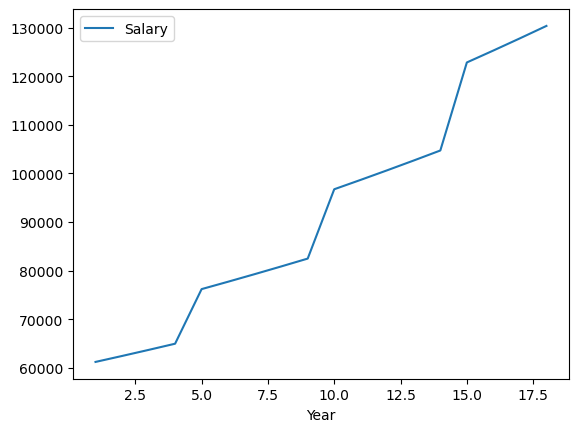

In [91]:
df.plot.line(x = "Year", y = "Salary")

<Axes: xlabel='Year'>

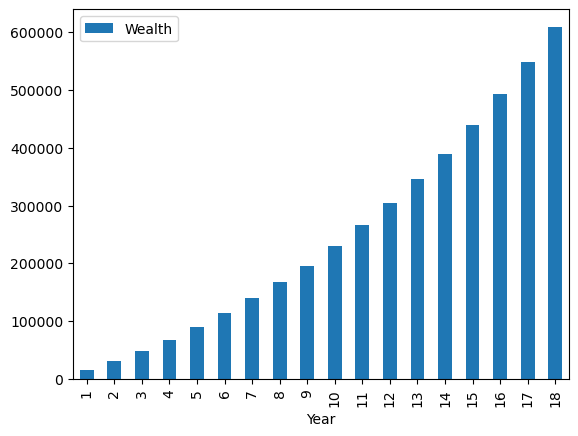

In [92]:
 df.plot.bar(x = "Year", y = "Wealth")